<a href="https://colab.research.google.com/github/Raj-Shriwastav/MyInternshipProjects-ExtionInfotech/blob/Sentiment-Analysis/Sentiment_Analysis_Extion_Infotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis Using NLTK**

---

> Internship Project From **Extion Infotech**

> Completed By **Raj Shriwastava**

# **Sentiment Analysis**

Sentiment analysis, also known as opinion mining, is a computational technique used to determine and quantify the emotional tone or subjective sentiment expressed within a piece of text. This method involves analyzing the words, phrases, and context present in the text to classify the overall sentiment as positive, negative, or neutral. By employing various natural language processing (NLP) techniques, sentiment analysis aims to extract insights about public opinion, customer feedback, or user sentiment from textual data. It is widely applied across industries for tasks such as social media monitoring, customer service analysis, market research, and reputation management.

## Lexicon-based Approach
This method of analysis entails utilizing a predetermined set of rules and heuristics to ascertain the sentiment conveyed within a text. These rules primarily rely on lexical and syntactic attributes of the text, including the identification of positive or negative words and phrases.

### Basic Setup

In [1]:
!pip install nltk

In [2]:
# import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

pd.set_option('display.max_colwidth', None)
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

### Loading the dataset

In [3]:
# Loading the amazon review dataset available in Github
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
df.head(100)

,reviewText,Positive
0,This is a one of the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff,1
1,This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.,1
2,this is a really cool game. there are a bunch of levels and you can find golden eggs. super fun.,1
3,"This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.",1
4,This is a terrific game on any pad. Hrs of fun. My grandkids love it. Great entertainment when waiting in long lines,1
...,...,...
95,"I'll admit, I'm late to the game for getting this wonderful game, but boy am I hooked! What a mindless way to spend hours at a time. Now what will I do when I have to go back to work?",1
96,"I love angry birds, I have no issue with ad supported games. I have a real issue with an &#34;ad supported game&#34; that constantly launches full screen ads that last substantially longer than the level you just played. The in game ads are fine, and w",0
97,I love the game and levels but I never have time to enjoy how far I get before there is another update that makes me delete the other version with all my progress on it.Now I rarely play it because I always have to play the same levels over and over.Why,0
98,I see nothing wrong with this game but I busy don't think it's fun. Shoot a pig with a bird. That's alp you do.,0


### Text Preprocessing
In sentiment analysis, **tokenization** serves as a crucial initial step, involving the segmentation of text into discrete units such as words or tokens. This segmentation aids in the analysis and comprehension of text by facilitating the isolation of individual elements from the raw text. Typically, tokenization is executed through NLTK's integrated `word_tokenize` function, which effectively divides the text into distinct words and punctuation marks.

Furthermore, techniques like **stemming** and **lemmatization** are employed to streamline words to their fundamental forms.

**Lemmatization** specifically focuses on reducing words to their base form according to their grammatical role. For instance, "jumped" would be lemmatized to "jump," while "jumping" remains unchanged as it represents a present participle.

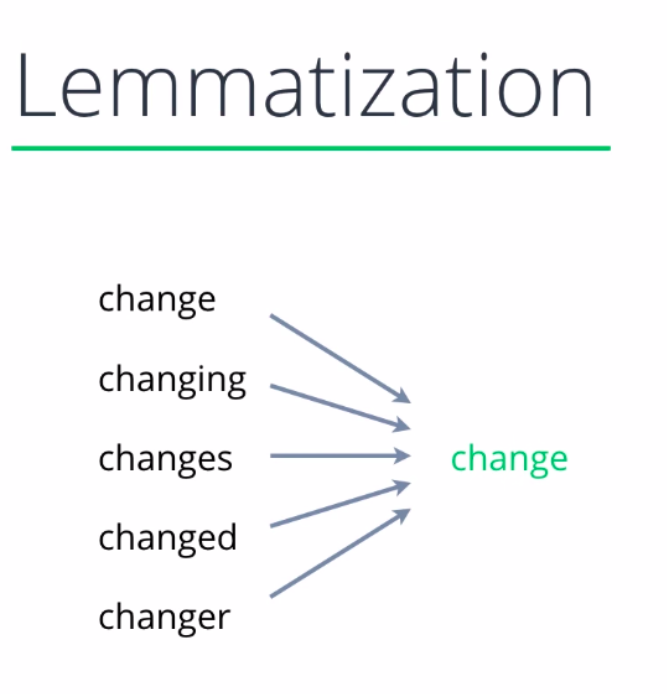

In [4]:
# create linguistic_preprocessing function
def linguistic_preprocessing(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

df['reviewText'] = df['reviewText'].apply(linguistic_preprocessing)
df.head()

,reviewText,Positive
0,one best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff,1
1,pretty good version game free . lot different level play . kid enjoy lot .,1
2,really cool game . bunch level find golden egg . super fun .,1
3,"silly game frustrating , lot fun definitely recommend fun time .",1
4,terrific game pad . hr fun . grandkids love . great entertainment waiting long line,1


### NLTK Sentiment Analyzer

In [5]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text) # yields -1 to 1
    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment

df['sentiment'] = df['reviewText'].apply(get_sentiment)

df.head()

,reviewText,Positive,sentiment
0,one best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff,1,1
1,pretty good version game free . lot different level play . kid enjoy lot .,1,1
2,really cool game . bunch level find golden egg . super fun .,1,1
3,"silly game frustrating , lot fun definitely recommend fun time .",1,1
4,terrific game pad . hr fun . grandkids love . great entertainment waiting long line,1,1


### Evaluating

In [6]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df['Positive'], df['sentiment']))

[[ 1131  3636]
 [  576 14657]]


In [7]:
from sklearn.metrics import classification_report
print(classification_report(df['Positive'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.66      0.24      0.35      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.60      0.61     20000
weighted avg       0.77      0.79      0.75     20000



In [8]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['Positive'], df['sentiment'])
print("Accuracy:", accuracy)


Accuracy: 0.7894


The final accuracy reached is 79%.